In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
import requests
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | shimoda
Processing Record 3 of Set 1 | los andes
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | porto de moz
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | paradwip
City not found. Skipping...
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | coos bay
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | balad
Processing Record 14 of Set 1 | te anau
Processing Record 15 of Set 1 | ponerihouen
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | pijijiapan
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | rexburg
Processing Record 20 of Set 1 | kstovo
Processing 

Processing Record 36 of Set 4 | nanzhang
Processing Record 37 of Set 4 | kinston
Processing Record 38 of Set 4 | vanavara
Processing Record 39 of Set 4 | estelle
Processing Record 40 of Set 4 | vestmannaeyjar
Processing Record 41 of Set 4 | road town
Processing Record 42 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 43 of Set 4 | quelimane
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | machali
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | yulara
Processing Record 48 of Set 4 | sao mateus
Processing Record 49 of Set 4 | rovaniemi
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | pachino
Processing Record 2 of Set 5 | awbari
Processing Record 3 of Set 5 | sola
Processing Record 4 of Set 5 | sinnamary
Processing Record 5 of Set 5 | gwadar
Processing Record 6 of Set 5 | riyadh
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | amderma
City not found. Skipping..

Processing Record 26 of Set 8 | shchebetovka
Processing Record 27 of Set 8 | kahului
Processing Record 28 of Set 8 | cravo norte
Processing Record 29 of Set 8 | kitimat
Processing Record 30 of Set 8 | casper
Processing Record 31 of Set 8 | osinovo
Processing Record 32 of Set 8 | lasa
Processing Record 33 of Set 8 | launceston
Processing Record 34 of Set 8 | ayna
Processing Record 35 of Set 8 | ozgon
City not found. Skipping...
Processing Record 36 of Set 8 | kawerau
Processing Record 37 of Set 8 | bara
Processing Record 38 of Set 8 | anapskaya
Processing Record 39 of Set 8 | balikpapan
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | itapui
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | gao
Processing Record 44 of Set 8 | shitanjing
Processing Record 45 of Set 8 | carballo
Processing Record 46 of Set 8 | ivankiv
Processing Record 47 of Set 8 | omboue
Processing Record 48 of Set 8 | waipawa
Processing Record 49 of Set 8 | samoded
Processi

Processing Record 9 of Set 12 | san angelo
Processing Record 10 of Set 12 | synya
Processing Record 11 of Set 12 | bud
Processing Record 12 of Set 12 | mitsamiouli
Processing Record 13 of Set 12 | san lawrenz
Processing Record 14 of Set 12 | vancouver
Processing Record 15 of Set 12 | aksay
Processing Record 16 of Set 12 | safford
Processing Record 17 of Set 12 | vao
Processing Record 18 of Set 12 | flin flon
Processing Record 19 of Set 12 | abu samrah
Processing Record 20 of Set 12 | moengo
Processing Record 21 of Set 12 | fort saint james
Processing Record 22 of Set 12 | xining
Processing Record 23 of Set 12 | basco
Processing Record 24 of Set 12 | yakovlevka
Processing Record 25 of Set 12 | portmore
Processing Record 26 of Set 12 | mount isa
Processing Record 27 of Set 12 | manaure
Processing Record 28 of Set 12 | la palma
Processing Record 29 of Set 12 | altayskoye
Processing Record 30 of Set 12 | bolshaya irba
City not found. Skipping...
Processing Record 31 of Set 12 | solnechnyy


In [10]:
print(len(city_data))

559


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,78.76,78,45,7.31,EC,2022-04-06 14:55:05
1,Shimoda,34.6667,138.9500,53.10,80,100,10.36,JP,2022-04-06 14:55:06
2,Los Andes,-32.8337,-70.5983,77.02,24,0,4.47,CL,2022-04-06 14:55:06
3,Georgetown,5.4112,100.3354,80.53,89,40,8.05,MY,2022-04-06 14:55:06
4,Port Alfred,-33.5906,26.8910,67.17,63,50,11.99,ZA,2022-04-06 14:55:07
5,Porto De Moz,-1.7483,-52.2383,77.56,86,100,2.44,BR,2022-04-06 14:55:07
6,Hithadhoo,-0.6000,73.0833,83.41,64,7,3.18,MV,2022-04-06 14:55:08
7,Coos Bay,43.3665,-124.2179,45.00,83,0,14.97,US,2022-04-06 14:55:08
8,Ushuaia,-54.8000,-68.3000,42.42,75,75,27.63,AR,2022-04-06 14:55:09
9,Airai,-8.9266,125.4092,59.09,91,61,2.48,TL,2022-04-06 14:55:09


In [12]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-04-06 14:55:05,-0.7393,-90.3518,78.76,78,45,7.31
1,Shimoda,JP,2022-04-06 14:55:06,34.6667,138.9500,53.10,80,100,10.36
2,Los Andes,CL,2022-04-06 14:55:06,-32.8337,-70.5983,77.02,24,0,4.47
3,Georgetown,MY,2022-04-06 14:55:06,5.4112,100.3354,80.53,89,40,8.05
4,Port Alfred,ZA,2022-04-06 14:55:07,-33.5906,26.8910,67.17,63,50,11.99
5,Porto De Moz,BR,2022-04-06 14:55:07,-1.7483,-52.2383,77.56,86,100,2.44
6,Hithadhoo,MV,2022-04-06 14:55:08,-0.6000,73.0833,83.41,64,7,3.18
7,Coos Bay,US,2022-04-06 14:55:08,43.3665,-124.2179,45.00,83,0,14.97
8,Ushuaia,AR,2022-04-06 14:55:09,-54.8000,-68.3000,42.42,75,75,27.63
9,Airai,TL,2022-04-06 14:55:09,-8.9266,125.4092,59.09,91,61,2.48


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

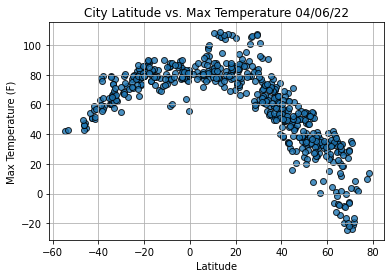

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

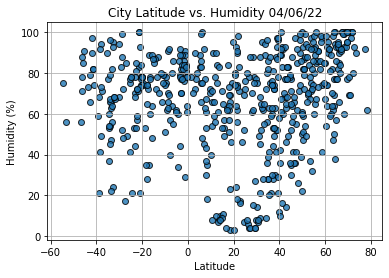

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

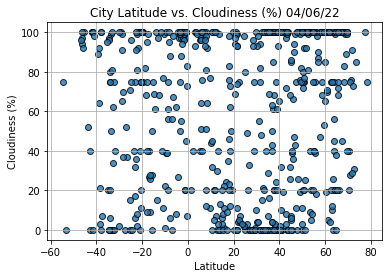

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

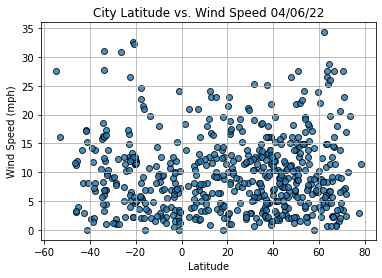

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City              Arraial Do Cabo
Country                        BR
Date          2022-04-06 14:55:10
Lat                      -22.9661
Lng                      -42.0278
Max Temp                    82.36
Humidity                       78
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
554     True
555     True
556    False
557    False
558    False
Name: Lat, Length: 559, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Shimoda,JP,2022-04-06 14:55:06,34.6667,138.9500,53.10,80,100,10.36
3,Georgetown,MY,2022-04-06 14:55:06,5.4112,100.3354,80.53,89,40,8.05
7,Coos Bay,US,2022-04-06 14:55:08,43.3665,-124.2179,45.00,83,0,14.97
10,Balad,IQ,2022-04-06 14:55:09,34.0164,44.1453,90.88,9,100,13.82
14,Pijijiapan,MX,2022-04-06 14:55:11,15.7011,-93.2300,87.67,53,1,3.71
...,...,...,...,...,...,...,...,...,...
551,Kirkuk,IQ,2022-04-06 15:00:06,35.4681,44.3922,79.14,20,100,10.98
552,Idar-Oberstein,DE,2022-04-06 15:00:08,49.7000,7.3000,54.48,60,100,7.00
553,Shadegan,IR,2022-04-06 15:00:10,30.6497,48.6647,92.64,8,98,5.01
554,Seoul,KR,2022-04-06 14:56:39,37.5683,126.9778,49.60,49,0,2.30


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

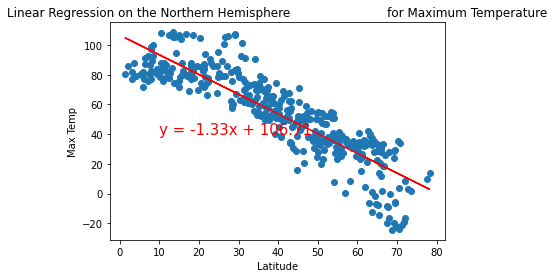

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

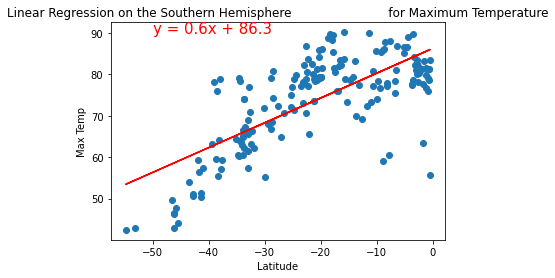

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

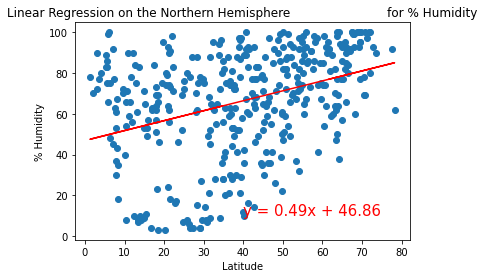

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

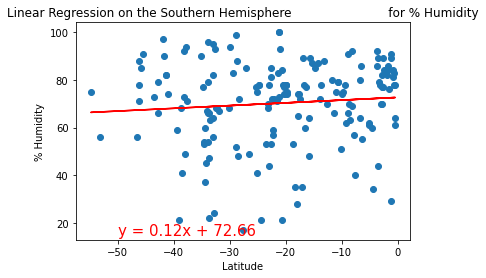

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

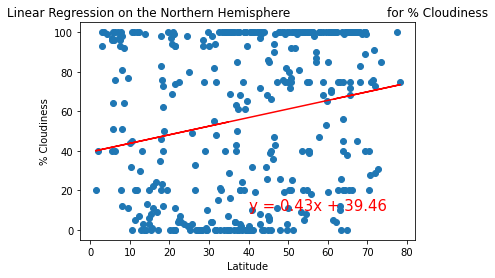

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

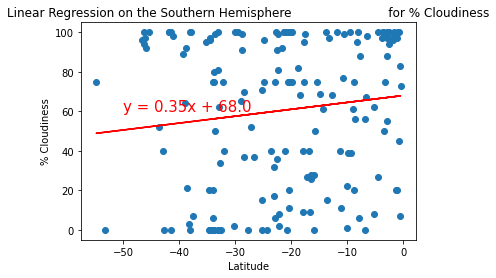

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

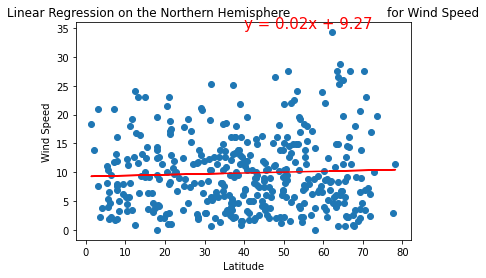

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

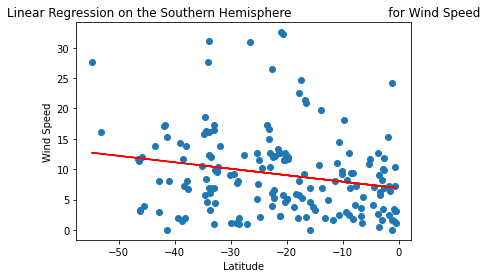

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))